# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

"""from gensim.models import Word2Vec
from gensim.models import KeyedVectors"""
import pickle

from tqdm import tqdm
import os
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## 1.1 Reading Data

In [2]:
import pandas as pd
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

In [5]:
#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)

sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kc: kc[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### Limiting data poits to 40K due to system constrain

In [13]:
project_data = project_data.iloc[0:40000,:]
X=project_data.drop(columns=["project_is_approved"])
Y=project_data["project_is_approved"]
X["project_grade_category"].value_counts()

Grades PreK-2    16815
Grades 3-5       13658
Grades 6-8        5866
Grades 9-12       3661
Name: project_grade_category, dtype: int64

In [14]:
X["project_grade_category"][X["project_grade_category"]=="Grades PreK-2"]="GradeA"
X["project_grade_category"][X["project_grade_category"]=="Grades 3-5"]="GradeB"
X["project_grade_category"][X["project_grade_category"]=="Grades 6-8"]="GradeC"
X["project_grade_category"][X["project_grade_category"]=="Grades 9-12"]="GradeD"

In [15]:
X.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay'],
      dtype='object')

## Preprocessing of `essay'

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 40000/40000 [00:26<00:00, 1481.82it/s]


In [17]:
X['essay']=preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(X['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|██████████| 40000/40000 [00:01<00:00, 33756.31it/s]


In [19]:
X['project_title']=preprocessed_project_title

## 1.5 Preparing data for models

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

__ Computing Sentiment Scores__

In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

"""import nltk
nltk.download('vader_lexicon')"""

sid = SentimentIntensityAnalyzer()

for_sentiment = 'good bad good' 
ss = sid.polarity_scores(for_sentiment)
print(ss["compound"])


for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

0.3182
compound: 0.3182, neu: 0.0, pos: 0.624, neg: 0.376, 

# Task: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [21]:
# splitting data into train and test
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20, random_state=42)

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [22]:
for i in [X_train,X_test,Y_train,Y_test]:
    print(i.shape)

(32000, 17)
(8000, 17)
(32000,)
(8000,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

#### encoding project_subject categorical

In [23]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=True, binary=True)
categories_one_hot_X_train = vectorizer.fit_transform(X_train['clean_categories'])
categories_one_hot_X_test = vectorizer.transform(X_test['clean_categories'])
print(vectorizer.get_feature_names())
print("categories_one_hot_X_train : {0} \ncategories_one_hot_X_test : {1} ".format(categories_one_hot_X_train.shape,categories_one_hot_X_test.shape))

['SpecialNeeds', 'Literacy_Language', 'Math_Science', 'History_Civics', 'Care_Hunger', 'AppliedLearning', 'Health_Sports', 'Music_Arts', 'Warmth']
categories_one_hot_X_train : (32000, 9) 
categories_one_hot_X_test : (8000, 9) 


#### Encoding project_subject  sub categorical

In [24]:
# we use count vectorizer to convert the values into one clean_subcategories
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot_X_train = vectorizer.fit_transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_X_test = vectorizer.transform(X_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("sub_categories_one_hot_X_train : {0}\nsub_categories_one_hot_X_test : {1}".\
      format(sub_categories_one_hot_X_train.shape,sub_categories_one_hot_X_test.shape))

['SocialSciences', 'Extracurricular', 'AppliedSciences', 'TeamSports', 'ESL', 'Other', 'Care_Hunger', 'Health_LifeScience', 'Health_Wellness', 'CharacterEducation', 'CommunityService', 'Mathematics', 'College_CareerPrep', 'SpecialNeeds', 'ParentInvolvement', 'Civics_Government', 'FinancialLiteracy', 'History_Geography', 'PerformingArts', 'Economics', 'VisualArts', 'Literature_Writing', 'Gym_Fitness', 'EarlyDevelopment', 'Music', 'Literacy', 'EnvironmentalScience', 'NutritionEducation', 'ForeignLanguages', 'Warmth']
sub_categories_one_hot_X_train : (32000, 30)
sub_categories_one_hot_X_test : (8000, 30)


#### Encoding school_state categorical

In [25]:
# we use count vectorizer to convert the values into one school_state
vectorizer = CountVectorizer()
school_state_one_hot_X_train = vectorizer.fit_transform(X_train['school_state'].values)
school_state_one_hot_X_test = vectorizer.transform(X_test['school_state'].values)
print(vectorizer.get_feature_names())
print("school_state_one_hot_X_train : {}\nschool_state_one_hot_X_test : {}".\
      format(school_state_one_hot_X_train.shape,school_state_one_hot_X_test.shape))

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
school_state_one_hot_X_train : (32000, 51)
school_state_one_hot_X_test : (8000, 51)


#### Encoding teacher_prefix categorical

In [26]:
# we use count vectorizer to convert the values into one hot encoded features
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True,encoding='utf-8')
vectorizer.fit(X_train['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())


teacher_prefix_one_hot_X_train = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_X_test = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("teacher_prefix_one_hot_X_train : {} \nteacher_prefix_one_hot_X_test : {}".\
      format(teacher_prefix_one_hot_X_train.shape,teacher_prefix_one_hot_X_test.shape))

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'nan']
teacher_prefix_one_hot_X_train : (32000, 6) 
teacher_prefix_one_hot_X_test : (8000, 6)


#### Encoding project_grade_category categorical

In [27]:
# we use count vectorizer to convert the values into one project_grade_category
vectorizer = CountVectorizer(lowercase=False,)

grade_one_hot_X_train=vectorizer.fit_transform(X_train["project_grade_category"])
grade_one_hot_X_test=vectorizer.fit_transform(X_test["project_grade_category"])

vectorizer.get_feature_names()
print("grade_one_hot_X_train : {} \ngrade_one_hot_X_test : {}".\
      format(grade_one_hot_X_train.shape,grade_one_hot_X_test.shape))

grade_one_hot_X_train : (32000, 4) 
grade_one_hot_X_test : (8000, 4)


In [28]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [29]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
price_standardized_X_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_standardized_X_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

In [30]:
Quantity_scalar = StandardScaler()
Quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
Quantity_X_train = Quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
Quantity_X_test = Quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

#### Bag of words

In [31]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features=5000)
essay_bow_X_train = vectorizer.fit_transform(X_train["essay"])
essay_bow_X_test = vectorizer.transform(X_test["essay"])

print("essay_bow_X_train : {} \nessay_bow_X_test : {}".\
      format(essay_bow_X_train.shape,essay_bow_X_test.shape))

essay_bow_X_train : (32000, 5000) 
essay_bow_X_test : (8000, 5000)


In [32]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features=5000)
project_title_bow_X_train = vectorizer.fit_transform(X_train["project_title"])
project_title_bow_X_test = vectorizer.transform(X_test["project_title"])

print("project_title_bow_X_train : {} \nproject_title_bow_X_test : {}".\
      format(project_title_bow_X_train.shape,project_title_bow_X_test.shape))

project_title_bow_X_train : (32000, 1455) 
project_title_bow_X_test : (8000, 1455)


#### TFIDF vectorizer

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features=5000)
essay_tfidf_X_train = vectorizer.fit_transform(X_train["essay"])
essay_tfidf_X_test = vectorizer.transform(X_test["essay"])

print("essay_tfidf_X_train : {} \nessay_tfidf_X_test : {}".\
      format(essay_tfidf_X_train.shape,essay_tfidf_X_test.shape))

essay_tfidf_X_train : (32000, 5000) 
essay_tfidf_X_test : (8000, 5000)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features=5000)
project_title_tfidf_X_train = vectorizer.fit_transform(X_train["project_title"])
project_title_tfidf_X_test = vectorizer.transform(X_test["project_title"])

print("project_title_tfidf_X_train : {} \nproject_title_tfidf_X_test : {}".\
      format(project_title_tfidf_X_train.shape,project_title_tfidf_X_test.shape))

project_title_tfidf_X_train : (32000, 1455) 
project_title_tfidf_X_test : (8000, 1455)


#### Using Pretrained Models: Avg W2V

In [35]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [36]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay_X_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (X_train["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_X_train.append(vector)
print(len(avg_w2v_vectors_essay_X_train))
print(len(avg_w2v_vectors_essay_X_train[0]))

32000
300


In [37]:
own_corpus = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["essay"]):
    for i in sentence.split(" "):
        if i not in own_corpus:
            own_corpus.append(i)

100%|██████████| 32000/32000 [01:41<00:00, 316.17it/s]


In [38]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay_X_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words and word in own_corpus:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_X_test.append(vector)
print(len(avg_w2v_vectors_essay_X_test))
print(len(avg_w2v_vectors_essay_X_test[0]))

100%|██████████| 8000/8000 [00:34<00:00, 235.07it/s]

8000
300


In [39]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_project_title_X_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (X_train["project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_X_train.append(vector)
print(len(avg_w2v_vectors_project_title_X_train))
print(len(avg_w2v_vectors_project_title_X_train[0]))

32000
300


In [40]:
corpus_project_title=[]
for title in (X_train["project_title"]):
    for i in title.split(" "):
        if i not in corpus_project_title:
            corpus_project_title.append(i)

In [41]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_project_title_X_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (X_test["project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words and word in corpus_project_title:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_X_test.append(vector)
print(len(avg_w2v_vectors_project_title_X_test))
print(len(avg_w2v_vectors_project_title_X_test[0]))

8000
300


#### Using Pretrained Models: TFIDF weighted W2V¶

In [42]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["essay"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [43]:
# TFIDF Word2Vec on essay
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_X_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (X_train["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_X_train.append(vector)
print(len(tfidf_w2v_vectors_essay_X_train))
print(len(tfidf_w2v_vectors_essay_X_train[0]))

32000
300


In [44]:
# TFIDF Word2Vec on essay
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_X_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (X_test["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_X_test.append(vector)
print(len(tfidf_w2v_vectors_essay_X_test))
print(len(tfidf_w2v_vectors_essay_X_test[0]))

8000
300


In [45]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["project_title"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_model_project_title = set(tfidf_model.get_feature_names())

In [46]:
# TFIDF Word2Vec on project_title
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_X_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (X_train["project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_model_project_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_X_train.append(vector)
print(len(tfidf_w2v_vectors_project_title_X_train))
print(len(tfidf_w2v_vectors_project_title_X_train[0]))

32000
300


In [47]:
# TFIDF Word2Vec on project_title
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_X_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (X_test["project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_model_project_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_X_test.append(vector)
print(len(tfidf_w2v_vectors_project_title_X_test))
print(len(tfidf_w2v_vectors_project_title_X_test[0]))

8000
300


<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [48]:
categorical_numerical_features_X_train=[categories_one_hot_X_train,sub_categories_one_hot_X_train,school_state_one_hot_X_train,\
                                        teacher_prefix_one_hot_X_train,grade_one_hot_X_train,price_standardized_X_train,Quantity_X_train]
categorical_numerical_features_X_test=[categories_one_hot_X_test,sub_categories_one_hot_X_test,school_state_one_hot_X_test,\
                                        teacher_prefix_one_hot_X_test,grade_one_hot_X_test,price_standardized_X_test,Quantity_X_test]

In [49]:
categorical_numerical_features_X_train_stack= hstack(categorical_numerical_features_X_train)
categorical_numerical_features_X_test_stack=  hstack(categorical_numerical_features_X_test)

#### creating list of  featuers in the same order which we have stacked data in SET1

In [50]:
categorical_numerical_feature_list=['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language',\
             'Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy',\
             'ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy',\
             'Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'nan',\
             'GradeA','GradeB','GradeC','GradeD',\
             'Price','Quantity']
len(categorical_numerical_feature_list)

102

In [51]:
vectorizer_essay_bow = CountVectorizer(min_df=10,max_features=5000)
essay_bow_X = vectorizer_essay_bow.fit_transform(X_train["essay"])
essay_bow_featuers = vectorizer_essay_bow.get_feature_names()
len(essay_bow_featuers)

5000

In [52]:
vectorizer_project_title_bow = CountVectorizer(min_df=10,max_features=5000)
essay_bow_X = vectorizer_project_title_bow.fit_transform(X_train["project_title"])
project_title_bow_featuers = vectorizer_project_title_bow.get_feature_names()
len(project_title_bow_featuers)

1455

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [53]:
print("Categorical_numerical_features_X_train_stack :{0}\
        \nCategorical_numerical_features_X_test_stack :{1}\
        \nEssay_bow_X_train :{2}\nEssay_bow_X_test :{3}\
        \nProject_title_bow_X_train :{4}\nProject_title_bow_X_test :{5}".\
        format(categorical_numerical_features_X_train_stack.shape,\
         categorical_numerical_features_X_test_stack.shape,\
         essay_bow_X_train.shape,essay_bow_X_test.shape,\
         project_title_bow_X_train.shape,project_title_bow_X_test.shape))

Categorical_numerical_features_X_train_stack :(32000, 102)        
Categorical_numerical_features_X_test_stack :(8000, 102)        
Essay_bow_X_train :(32000, 5000)
Essay_bow_X_test :(8000, 5000)        
Project_title_bow_X_train :(32000, 1455)
Project_title_bow_X_test :(8000, 1455)


In [54]:
all_featuers = np.hstack((categorical_numerical_feature_list,essay_bow_featuers,project_title_bow_featuers))
print(len(all_featuers))

6557


### categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)

In [55]:
Set1_train=hstack((categorical_numerical_features_X_train_stack,essay_bow_X_train,project_title_bow_X_train)).toarray()
Set1_test=hstack((categorical_numerical_features_X_test_stack,essay_bow_X_test,project_title_bow_X_test)).toarray()

In [56]:
Set1_train.shape

(32000, 6557)

In [57]:
DT = DecisionTreeClassifier()
param_grid = {"max_depth":[1, 5, 10, 50, 100, 500, 1000],"min_samples_split": [5, 10, 100, 500]}
clf = GridSearchCV(DT,param_grid = param_grid,cv=3, scoring='roc_auc')
clf.fit(Set1_train,Y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [5, 10, 100, 500], 'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [58]:
clf.cv_results_['mean_train_score']

array([0.56548692, 0.56548692, 0.56548692, 0.56548692, 0.68284549,
       0.68258885, 0.68247933, 0.68163772, 0.74157534, 0.73965707,
       0.7358531 , 0.72254616, 0.95691301, 0.95054355, 0.91723665,
       0.84104366, 0.99417385, 0.99009825, 0.964361  , 0.90002518,
       0.9988738 , 0.9943952 , 0.97194319, 0.91703749, 0.9989202 ,
       0.99445265, 0.97166446, 0.91251511])

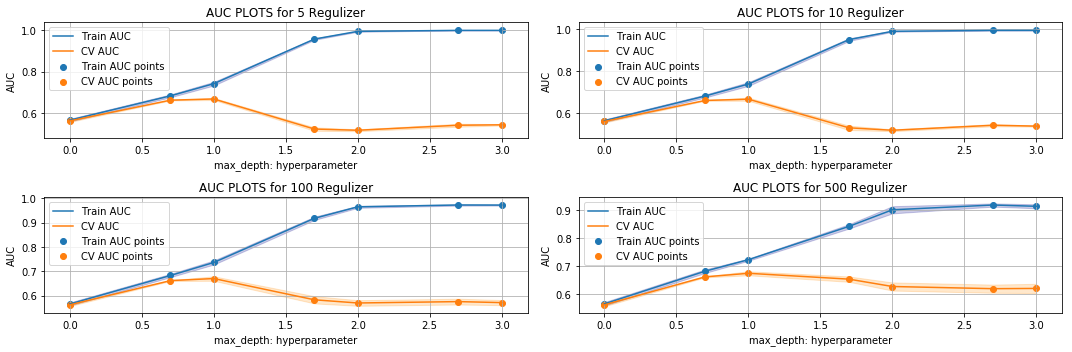

In [59]:
plt.figure(figsize=(15,5))

train_auc_5= clf.cv_results_['mean_train_score'][::4]
train_auc_std_5= clf.cv_results_['std_train_score'][::4]
cv_auc_5 = clf.cv_results_['mean_test_score'][::4]
cv_auc_std_5= clf.cv_results_['std_test_score'][::4]

plt.subplot(2,2,1)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_5, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_5 - train_auc_std_5,train_auc_5 + train_auc_std_5,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), cv_auc_5, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),cv_auc_5 - cv_auc_std_5,cv_auc_5 + cv_auc_std_5,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_5, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), cv_auc_5, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 5 Regulizer")
plt.grid()

train_auc_10= clf.cv_results_['mean_train_score'][1::4]
train_auc_std_10= clf.cv_results_['std_train_score'][1::4]

cv_auc_10 = clf.cv_results_['mean_test_score'][1::4]
cv_auc_std_10= clf.cv_results_['std_test_score'][1::4]


plt.subplot(2,2,2)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_10, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_10 - train_auc_std_10,train_auc_10 + train_auc_std_10,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), cv_auc_10, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),cv_auc_10 - cv_auc_std_10,cv_auc_10 + cv_auc_std_10,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_10, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), cv_auc_10, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 10 Regulizer")
plt.grid()


train_auc_100= clf.cv_results_['mean_train_score'][2::4]
train_auc_std_100= clf.cv_results_['std_train_score'][2::4]
Cv_auc_100 = clf.cv_results_['mean_test_score'][2::4]
Cv_auc_std_100= clf.cv_results_['std_test_score'][2::4]

plt.subplot(2,2,3)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_100, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_100 - train_auc_std_100,train_auc_100 + train_auc_std_100,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), Cv_auc_100, label='CV AUC')
plt.gca().fill_between(np.log10(param_grid["max_depth"]),Cv_auc_100 - Cv_auc_std_100,Cv_auc_100 + Cv_auc_std_100,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_100, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), Cv_auc_100, label='CV AUC points')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 100 Regulizer")
plt.grid()

train_auc_500= clf.cv_results_['mean_train_score'][3::4]
train_auc_std_500= clf.cv_results_['std_train_score'][3::4]
Cv_auc_500 = clf.cv_results_['mean_test_score'][3::4]
Cv_auc_std_500= clf.cv_results_['std_test_score'][3::4]

plt.subplot(2,2,4)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_500, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_500 - train_auc_std_500,train_auc_500 + train_auc_std_500,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), Cv_auc_500, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),Cv_auc_500 - Cv_auc_std_500,Cv_auc_500 + Cv_auc_std_500,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_500, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), Cv_auc_500, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 500 Regulizer")
plt.grid()
plt.tight_layout()
plt.show()

In [61]:
max_auc = np.max(clf.cv_results_['mean_test_score'])
best_fit_dept_Set1=clf.best_params_["max_depth"]
best_fit_min_split_Set1=clf.best_params_["min_samples_split"]
print('Best_max_depth : {}\nBest_min_samples_split : {}\nmax_auc : {}'.format (best_fit_dept_Set1,best_fit_min_split_Set1,max_auc))

Best_max_depth : 10
Best_min_samples_split : 500
max_auc : 0.6741306600307605


In [62]:
model_for_tree = DecisionTreeClassifier(max_depth=3,min_samples_split=best_fit_min_split_Set1)
model_for_tree = model_for_tree.fit(Set1_train,Y_train)

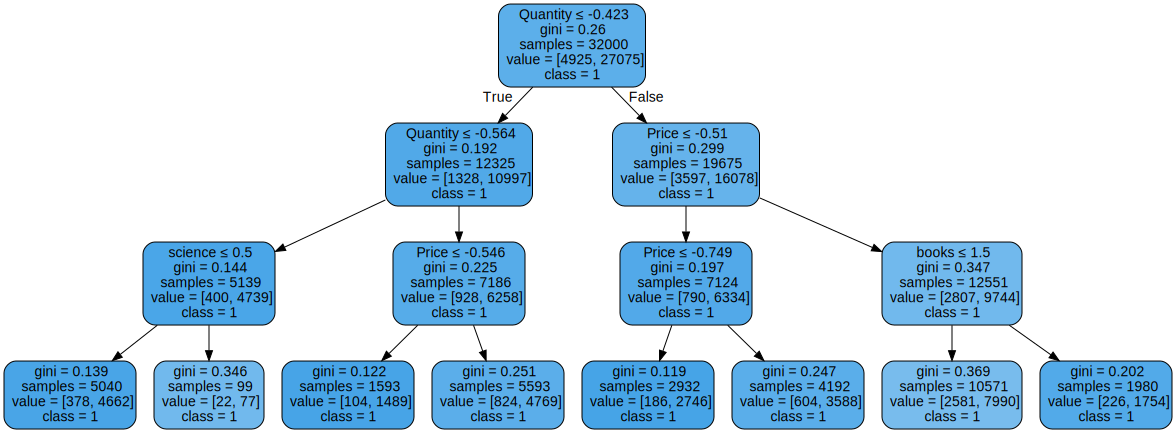

In [63]:
#https://scikit-learn.org/stable/modules/tree.html
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model_for_tree, out_file=None, 
                                  feature_names=all_featuers,  
                                  class_names=["0","1"],
                                  filled=True, rounded=True,  
                                  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [64]:
model1 = DecisionTreeClassifier(max_depth=best_fit_dept_Set1,min_samples_split=best_fit_min_split_Set1)
model1 = model1.fit(Set1_train,Y_train)

In [65]:
fpr_tr,tpr_tr,th_tr = roc_curve(y_true=Y_train,y_score=model1.predict_proba(Set1_train)[:,1])
auc_train = roc_auc_score(y_true=Y_train,y_score=model1.predict_proba(Set1_train)[:,1])
fpr_te,tpr_te,th_te = roc_curve(y_true=Y_test,y_score=model1.predict_proba(Set1_test)[:,1])
auc_test = roc_auc_score(y_true=Y_test,y_score=model1.predict_proba(Set1_test)[:,1])

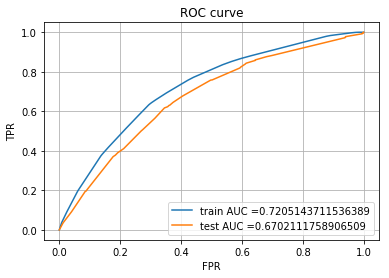

In [66]:
plt.plot(fpr_tr, tpr_tr, label="train AUC ="+str(auc_train))
plt.plot(fpr_te, tpr_te, label="test AUC ="+str(auc_test))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

In [67]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [68]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(model1.predict_proba(Set1_train)[:,-1], th_tr, fpr_tr, tpr_tr)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(model1.predict_proba(Set1_test)[:,1], th_te, fpr_te, tpr_te)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.44969926927926285 for threshold 0.852
[[ 3359  1566]
 [ 9223 17852]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4040071081683078 for threshold 0.852
[[ 758  452]
 [2411 4379]]


the maximum value of tpr*(1-fpr) 0.4040071081683078 for threshold 0.852


Text(0.5, 1.0, 'Confusion matrix for Test data')

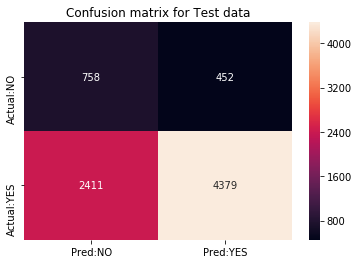

In [69]:
from seaborn import heatmap
heatmap(confusion_matrix(Y_test, predict(model1.predict_proba(Set1_test)[:,1], th_te, fpr_te, tpr_te)),annot=True, fmt="d",xticklabels=["Pred:NO","Pred:YES"],yticklabels=["Actual:NO","Actual:YES"])
plt.title("Confusion matrix for Test data")

#### Finding False positive data points

In [71]:
model_predicted = np.array([predict(model1.predict_proba(Set1_test)[:,1], th_te, fpr_te, tpr_te)]).reshape(Set1_test.shape[0],-1)[:,0]

the maximum value of tpr*(1-fpr) 0.4040071081683078 for threshold 0.852


In [72]:
def index (array) :
    index = []
    for i in range (len(array)):
        if (array[i]==True):
            index.append(i)
    return index

In [73]:
Predicted_1 = model_predicted ==1
unique,counts = np.unique(Predicted_1,return_counts=True)
print(dict(zip(unique, counts)))
index_Predicted_1 = index(Predicted_1)
print(len(index_Predicted_1))

{False: 3169, True: 4831}
4831


In [74]:
Actual_0 = np.array(Y_test) == 0
unique,counts = np.unique(Actual_0,return_counts=True)
print(dict(zip(unique, counts)))
index_Actual_0 = index(Actual_0)
print(len(index_Actual_0))

{False: 6790, True: 1210}
1210


In [75]:
FP_index = []
for i in index_Actual_0:
    if i in index_Predicted_1:
        FP_index.append(i)
print("index of Fp : ",FP_index)
print("Number of FP index we got : ",len(FP_index))
confus_matrix=confusion_matrix(np.array(Y_test), model_predicted)
print("Number of FP from confus_matrix: ",confus_matrix[0,1])

index of Fp :  [13, 32, 65, 69, 70, 73, 97, 99, 123, 132, 147, 156, 203, 208, 232, 233, 245, 263, 266, 303, 316, 332, 333, 339, 354, 368, 394, 417, 429, 453, 462, 484, 498, 554, 556, 564, 574, 581, 634, 637, 640, 642, 645, 653, 664, 693, 696, 701, 702, 711, 714, 715, 723, 797, 810, 813, 820, 842, 854, 863, 879, 883, 890, 931, 968, 986, 1001, 1015, 1027, 1037, 1057, 1062, 1083, 1085, 1090, 1100, 1108, 1110, 1112, 1120, 1128, 1132, 1137, 1163, 1183, 1205, 1208, 1246, 1250, 1259, 1296, 1367, 1380, 1431, 1450, 1452, 1463, 1478, 1492, 1499, 1504, 1508, 1515, 1538, 1559, 1566, 1574, 1575, 1577, 1586, 1589, 1604, 1608, 1646, 1656, 1667, 1681, 1696, 1705, 1707, 1786, 1797, 1809, 1831, 1837, 1868, 1927, 1930, 2001, 2030, 2032, 2041, 2068, 2096, 2110, 2113, 2128, 2154, 2174, 2198, 2225, 2228, 2242, 2254, 2303, 2339, 2361, 2376, 2388, 2427, 2457, 2467, 2497, 2499, 2501, 2508, 2524, 2537, 2554, 2566, 2587, 2588, 2592, 2643, 2653, 2680, 2705, 2709, 2714, 2715, 2716, 2728, 2762, 2772, 2778, 2795, 29

In [76]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity'],
      dtype='object')

#### Building wordcloud

In [77]:
FP_essay = X_test["essay"][FP_index]

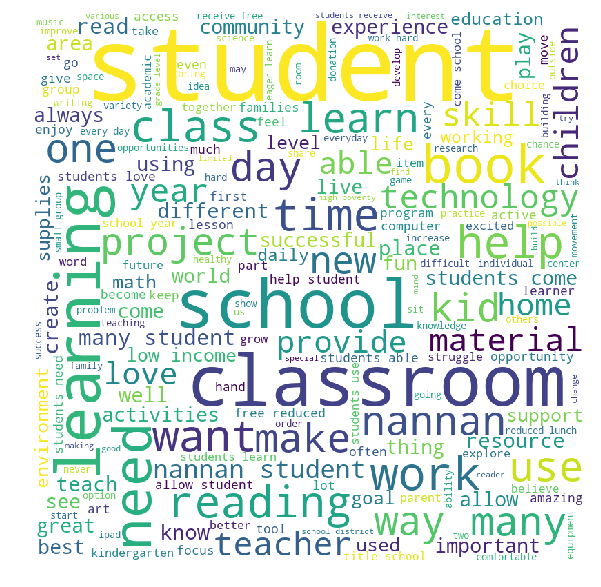

In [78]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in FP_essay: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### BOX plot of price of these False positive data points`

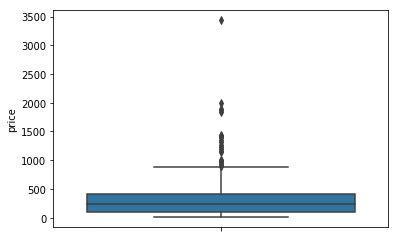

In [79]:
import seaborn
seaborn.boxplot(X_test["price"][FP_index],orient='v')

#### PDF of  teacher_number_of_previously_posted_projects of these False positive data points`

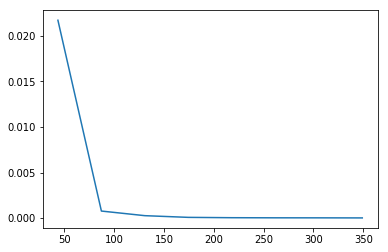

In [86]:
#https://stackoverflow.com/questions/37373457/how-to-plot-probability-density-function-pdf-of-inter-arrival-time-of-events
Teacher_posted = X_test["teacher_number_of_previously_posted_projects"]
hist, bins = np.histogram(Teacher_posted, bins=8, normed=True)
plt.plot(bins[1:], hist)

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [88]:
Set2_train=hstack((categorical_numerical_features_X_train_stack,essay_tfidf_X_train,project_title_tfidf_X_train)).toarray()
Set2_test=hstack((categorical_numerical_features_X_test_stack,essay_tfidf_X_test,project_title_tfidf_X_test)).toarray()

In [89]:
DT = DecisionTreeClassifier()
param_grid = {"max_depth":[1, 5, 10, 50, 100, 500, 1000],"min_samples_split": [5, 10, 100, 500]}
clf = GridSearchCV(DT,param_grid = param_grid,cv=3, scoring='roc_auc')
clf.fit(Set2_train,Y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [5, 10, 100, 500], 'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

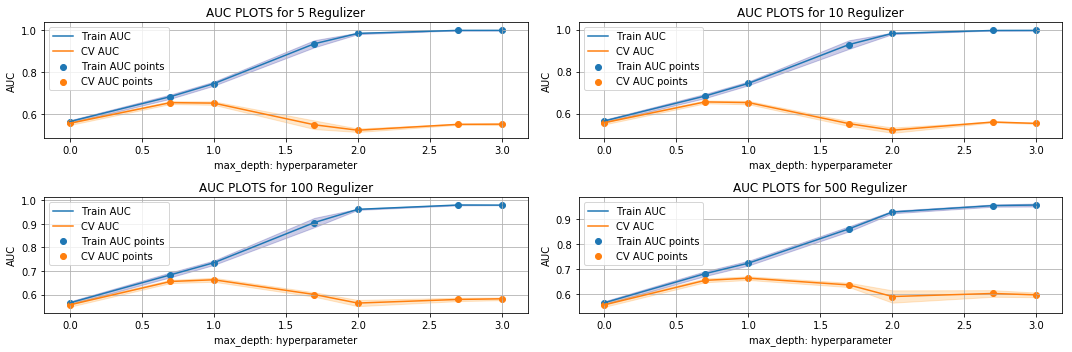

In [92]:
plt.figure(figsize=(15,5))

train_auc_5= clf.cv_results_['mean_train_score'][::4]
train_auc_std_5= clf.cv_results_['std_train_score'][::4]
cv_auc_5 = clf.cv_results_['mean_test_score'][::4]
cv_auc_std_5= clf.cv_results_['std_test_score'][::4]

plt.subplot(2,2,1)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_5, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_5 - train_auc_std_5,train_auc_5 + train_auc_std_5,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), cv_auc_5, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),cv_auc_5 - cv_auc_std_5,cv_auc_5 + cv_auc_std_5,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_5, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), cv_auc_5, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 5 Regulizer")
plt.grid()

train_auc_10= clf.cv_results_['mean_train_score'][1::4]
train_auc_std_10= clf.cv_results_['std_train_score'][1::4]

cv_auc_10 = clf.cv_results_['mean_test_score'][1::4]
cv_auc_std_10= clf.cv_results_['std_test_score'][1::4]


plt.subplot(2,2,2)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_10, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_10 - train_auc_std_10,train_auc_10 + train_auc_std_10,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), cv_auc_10, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),cv_auc_10 - cv_auc_std_10,cv_auc_10 + cv_auc_std_10,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_10, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), cv_auc_10, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 10 Regulizer")
plt.grid()


train_auc_100= clf.cv_results_['mean_train_score'][2::4]
train_auc_std_100= clf.cv_results_['std_train_score'][2::4]
Cv_auc_100 = clf.cv_results_['mean_test_score'][2::4]
Cv_auc_std_100= clf.cv_results_['std_test_score'][2::4]

plt.subplot(2,2,3)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_100, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_100 - train_auc_std_100,train_auc_100 + train_auc_std_100,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), Cv_auc_100, label='CV AUC')
plt.gca().fill_between(np.log10(param_grid["max_depth"]),Cv_auc_100 - Cv_auc_std_100,Cv_auc_100 + Cv_auc_std_100,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_100, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), Cv_auc_100, label='CV AUC points')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 100 Regulizer")
plt.grid()

train_auc_500= clf.cv_results_['mean_train_score'][3::4]
train_auc_std_500= clf.cv_results_['std_train_score'][3::4]
Cv_auc_500 = clf.cv_results_['mean_test_score'][3::4]
Cv_auc_std_500= clf.cv_results_['std_test_score'][3::4]

plt.subplot(2,2,4)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_500, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_500 - train_auc_std_500,train_auc_500 + train_auc_std_500,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), Cv_auc_500, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),Cv_auc_500 - Cv_auc_std_500,Cv_auc_500 + Cv_auc_std_500,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_500, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), Cv_auc_500, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 500 Regulizer")
plt.grid()
plt.tight_layout()
plt.show()

In [95]:
max_auc = np.max(clf.cv_results_['mean_test_score'])
best_fit_dept_Set2=clf.best_params_["max_depth"]
best_fit_min_split_Set2=clf.best_params_["min_samples_split"]
print('Best_max_depth : {}\nBest_min_samples_split : {}\nmax_auc : {}'.format (best_fit_dept_Set2,best_fit_min_split_Set2,max_auc))

Best_max_depth : 10
Best_min_samples_split : 500
max_auc : 0.6640837288485731


In [96]:
model_for_tree = DecisionTreeClassifier(max_depth=3,min_samples_split=best_fit_min_split_Set2)
model_for_tree = model_for_tree.fit(Set2_train,Y_train)

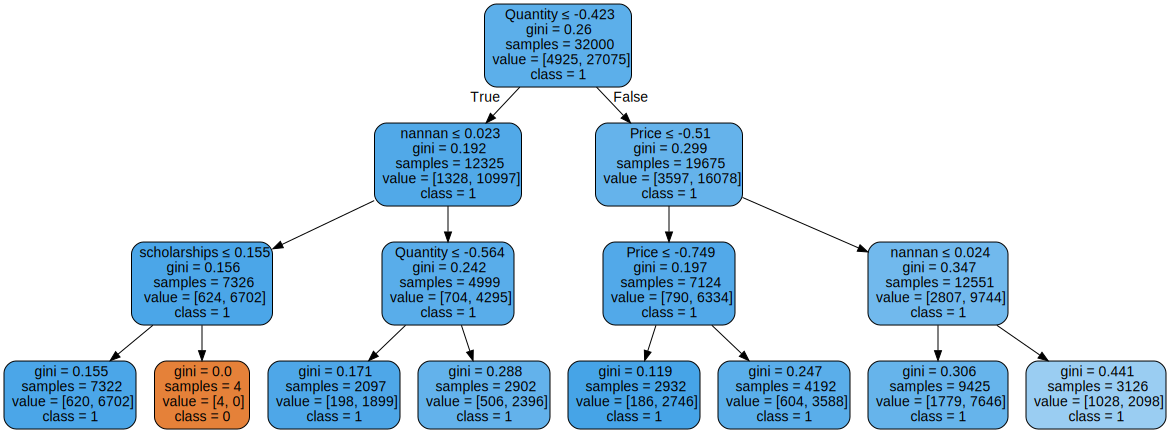

In [97]:
#https://scikit-learn.org/stable/modules/tree.html
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model_for_tree, out_file=None, 
                                  feature_names=all_featuers,  
                                  class_names=["0","1"],
                                  filled=True, rounded=True,  
                                  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [98]:
model2 = DecisionTreeClassifier(max_depth=best_fit_dept_Set2,min_samples_split=best_fit_min_split_Set2)
model2 = model2.fit(Set2_train,Y_train)

In [99]:
fpr_tr,tpr_tr,th_tr = roc_curve(y_true=Y_train,y_score=model2.predict_proba(Set2_train)[:,1])
auc_train = roc_auc_score(y_true=Y_train,y_score=model2.predict_proba(Set2_train)[:,1])
fpr_te,tpr_te,th_te = roc_curve(y_true=Y_test,y_score=model2.predict_proba(Set2_test)[:,1])
auc_test = roc_auc_score(y_true=Y_test,y_score=model2.predict_proba(Set2_test)[:,1])

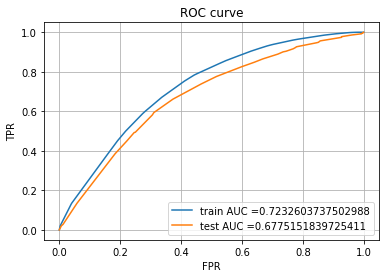

In [100]:
plt.plot(fpr_tr, tpr_tr, label="train AUC ="+str(auc_train))
plt.plot(fpr_te, tpr_te, label="test AUC ="+str(auc_test))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

In [101]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [102]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(model2.predict_proba(Set2_train)[:,-1], th_tr, fpr_tr, tpr_tr)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(model2.predict_proba(Set2_test)[:,1], th_te, fpr_te, tpr_te)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.44503729534897896 for threshold 0.877
[[ 3266  1659]
 [ 8905 18170]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.41452476295962704 for threshold 0.877
[[ 758  452]
 [2297 4493]]


the maximum value of tpr*(1-fpr) 0.41452476295962704 for threshold 0.877


Text(0.5, 1.0, 'Confusion matrix for Test data')

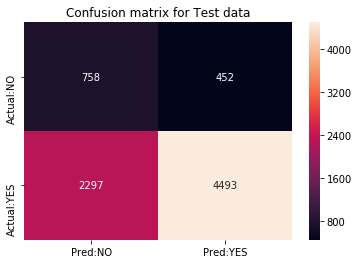

In [104]:
from seaborn import heatmap
heatmap((confusion_matrix(Y_test, predict(model2.predict_proba(Set2_test)[:,1], th_te, fpr_te, tpr_te))),annot=True, fmt="d",xticklabels=["Pred:NO","Pred:YES"],yticklabels=["Actual:NO","Actual:YES"])
plt.title("Confusion matrix for Test data")

#### Finding False positive data points

In [105]:
model_predicted = np.array([predict(model2.predict_proba(Set2_test)[:,1], th_te, fpr_te, tpr_te)])\
.reshape(Set2_test.shape[0],-1)[:,0]

the maximum value of tpr*(1-fpr) 0.41452476295962704 for threshold 0.877


In [106]:
def index (array) :
    index = []
    for i in range (len(array)):
        if (array[i]==True):
            index.append(i)
    return index

In [107]:
Predicted_1 = model_predicted ==1
unique,counts = np.unique(Predicted_1,return_counts=True)
print(dict(zip(unique, counts)))
index_Predicted_1 = index(Predicted_1)
print(len(index_Predicted_1))

{False: 3055, True: 4945}
4945


In [108]:
Actual_0 = np.array(Y_test) == 0
unique,counts = np.unique(Actual_0,return_counts=True)
print(dict(zip(unique, counts)))
index_Actual_0 = index(Actual_0)
print(len(index_Actual_0))

{False: 6790, True: 1210}
1210


In [110]:
FP_index = []
for i in index_Actual_0:
    if i in index_Predicted_1:
        FP_index.append(i)
print("Number of FP index we got : ",len(FP_index))
confus_matrix=confusion_matrix(np.array(Y_test), model_predicted)
print("Number of FP from confus_matrix: ",confus_matrix[0,1])


Number of FP index we got :  452
Number of FP from confus_matrix:  452


#### Building wordcloud

In [111]:
FP_essay = X_test["essay"][FP_index]

In [112]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
  
comment_words = ' '
stopwords = set(STOPWORDS) 

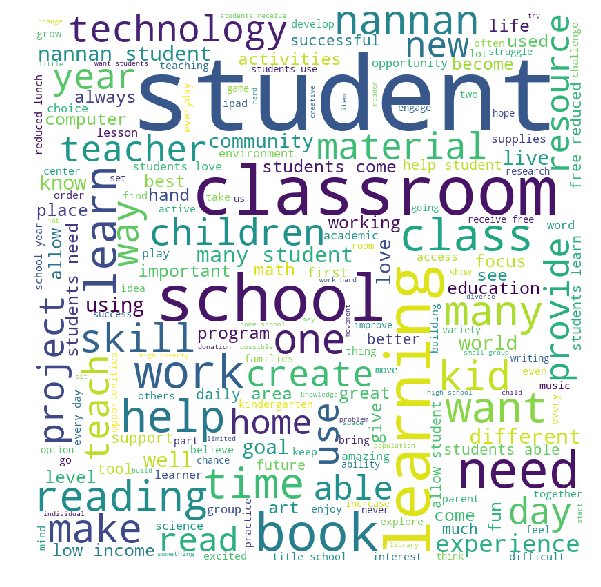

In [113]:
# iterate through the csv file 
for val in FP_essay: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### BOX plot of price of these False positive data points`

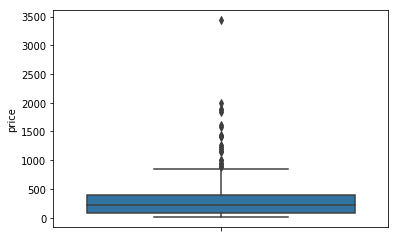

In [114]:
import seaborn
seaborn.boxplot(X_test["price"][FP_index],orient='v')

#### PDF of  teacher_number_of_previously_posted_projects of these False positive data points`

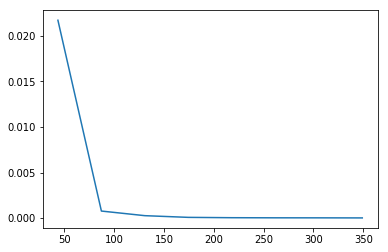

In [115]:
#https://stackoverflow.com/questions/37373457/how-to-plot-probability-density-function-pdf-of-inter-arrival-time-of-events
Teacher_posted = X_test["teacher_number_of_previously_posted_projects"]
hist, bins = np.histogram(Teacher_posted, bins=8, normed=True)
plt.plot(bins[1:], hist)

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [53]:
Set3_train=hstack((categorical_numerical_features_X_train_stack,avg_w2v_vectors_essay_X_train,avg_w2v_vectors_project_title_X_train)).toarray()
Set3_test=hstack((categorical_numerical_features_X_test_stack,avg_w2v_vectors_essay_X_test,avg_w2v_vectors_project_title_X_test)).toarray()

In [54]:
DT = DecisionTreeClassifier()
param_grid = {"max_depth":[1, 5, 10, 50, 100, 500, 1000],"min_samples_split": [5, 10, 100, 500]}
clf = GridSearchCV(DT,param_grid = param_grid,cv=3, scoring='roc_auc')
clf.fit(Set3_train,Y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

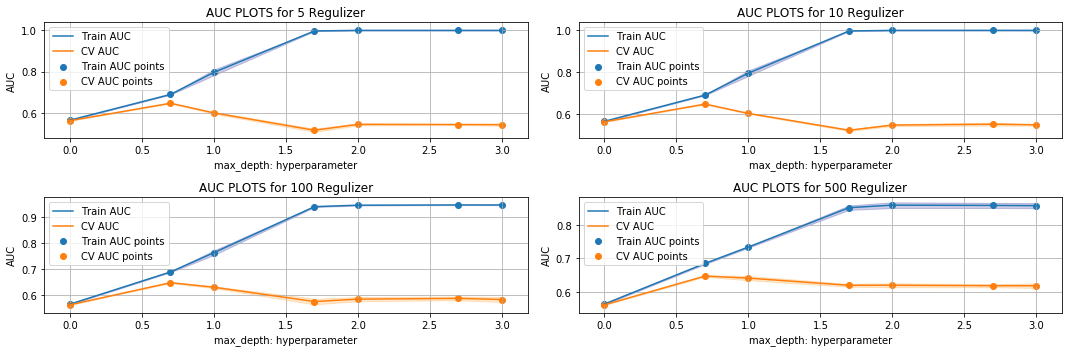

In [55]:
plt.figure(figsize=(15,5))

train_auc_5= clf.cv_results_['mean_train_score'][::4]
train_auc_std_5= clf.cv_results_['std_train_score'][::4]
cv_auc_5 = clf.cv_results_['mean_test_score'][::4]
cv_auc_std_5= clf.cv_results_['std_test_score'][::4]

plt.subplot(2,2,1)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_5, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_5 - train_auc_std_5,train_auc_5 + train_auc_std_5,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), cv_auc_5, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),cv_auc_5 - cv_auc_std_5,cv_auc_5 + cv_auc_std_5,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_5, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), cv_auc_5, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 5 Regulizer")
plt.grid()

train_auc_10= clf.cv_results_['mean_train_score'][1::4]
train_auc_std_10= clf.cv_results_['std_train_score'][1::4]

cv_auc_10 = clf.cv_results_['mean_test_score'][1::4]
cv_auc_std_10= clf.cv_results_['std_test_score'][1::4]


plt.subplot(2,2,2)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_10, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_10 - train_auc_std_10,train_auc_10 + train_auc_std_10,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), cv_auc_10, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),cv_auc_10 - cv_auc_std_10,cv_auc_10 + cv_auc_std_10,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_10, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), cv_auc_10, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 10 Regulizer")
plt.grid()


train_auc_100= clf.cv_results_['mean_train_score'][2::4]
train_auc_std_100= clf.cv_results_['std_train_score'][2::4]
Cv_auc_100 = clf.cv_results_['mean_test_score'][2::4]
Cv_auc_std_100= clf.cv_results_['std_test_score'][2::4]

plt.subplot(2,2,3)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_100, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_100 - train_auc_std_100,train_auc_100 + train_auc_std_100,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), Cv_auc_100, label='CV AUC')
plt.gca().fill_between(np.log10(param_grid["max_depth"]),Cv_auc_100 - Cv_auc_std_100,Cv_auc_100 + Cv_auc_std_100,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_100, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), Cv_auc_100, label='CV AUC points')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 100 Regulizer")
plt.grid()

train_auc_500= clf.cv_results_['mean_train_score'][3::4]
train_auc_std_500= clf.cv_results_['std_train_score'][3::4]
Cv_auc_500 = clf.cv_results_['mean_test_score'][3::4]
Cv_auc_std_500= clf.cv_results_['std_test_score'][3::4]

plt.subplot(2,2,4)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_500, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_500 - train_auc_std_500,train_auc_500 + train_auc_std_500,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), Cv_auc_500, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),Cv_auc_500 - Cv_auc_std_500,Cv_auc_500 + Cv_auc_std_500,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_500, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), Cv_auc_500, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 500 Regulizer")
plt.grid()
plt.tight_layout()
plt.show()

In [56]:
max_auc = np.max(clf.cv_results_['mean_test_score'])
best_fit_dept_Set3=clf.best_params_["max_depth"]
best_fit_min_split_Set3=clf.best_params_["min_samples_split"]
print('Best_max_depth : {}\nBest_min_samples_split : {}\nmax_auc : {}'.format (best_fit_dept_Set3,best_fit_min_split_Set3,max_auc))

Best_max_depth : 5
Best_min_samples_split : 500
max_auc : 0.6475191897461923


In [57]:
model3 = DecisionTreeClassifier(max_depth=best_fit_dept_Set3,min_samples_split=best_fit_min_split_Set3)
model3 = model3.fit(Set3_train,Y_train)

In [58]:
fpr_tr,tpr_tr,th_tr = roc_curve(y_true=Y_train,y_score=model3.predict_proba(Set3_train)[:,1])
auc_train = roc_auc_score(y_true=Y_train,y_score=model3.predict_proba(Set3_train)[:,1])
fpr_te,tpr_te,th_te = roc_curve(y_true=Y_test,y_score=model3.predict_proba(Set3_test)[:,1])
auc_test = roc_auc_score(y_true=Y_test,y_score=model3.predict_proba(Set3_test)[:,1])

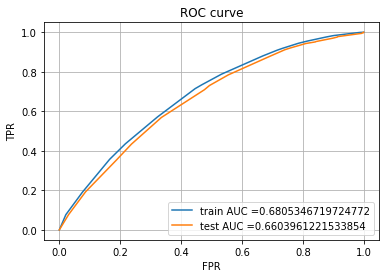

In [59]:
plt.plot(fpr_tr, tpr_tr, label="train AUC ="+str(auc_train))
plt.plot(fpr_te, tpr_te, label="test AUC ="+str(auc_test))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

In [60]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [61]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(model3.predict_proba(Set3_train)[:,-1], th_tr, fpr_tr, tpr_tr)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(model3.predict_proba(Set3_test)[:,1], th_te, fpr_te, tpr_te)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.395723104180435 for threshold 0.864
[[ 2727  2198]
 [ 7725 19350]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.37802943073795925 for threshold 0.876
[[ 804  406]
 [2927 3863]]


the maximum value of tpr*(1-fpr) 0.37802943073795925 for threshold 0.876


Text(0.5, 1.0, 'Confusion matrix for Test data')

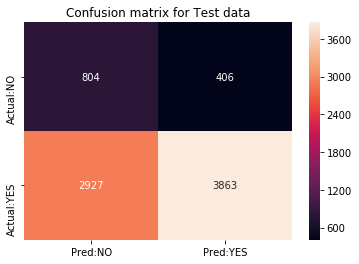

In [62]:
from seaborn import heatmap
heatmap((confusion_matrix(Y_test, predict(model3.predict_proba(Set3_test)[:,1], th_te, fpr_te, tpr_te))),annot=True, fmt="d",xticklabels=["Pred:NO","Pred:YES"],yticklabels=["Actual:NO","Actual:YES"])
plt.title("Confusion matrix for Test data")

#### Finding False positive data points

In [63]:
model_predicted = np.array([predict(model3.predict_proba(Set3_test)[:,1], th_te, fpr_te, tpr_te)])\
.reshape(Set3_test.shape[0],-1)[:,0]

the maximum value of tpr*(1-fpr) 0.37802943073795925 for threshold 0.876


In [64]:
def index (array) :
    index = []
    for i in range (len(array)):
        if (array[i]==True):
            index.append(i)
    return index

In [65]:
Predicted_1 = model_predicted ==1
unique,counts = np.unique(Predicted_1,return_counts=True)
print(dict(zip(unique, counts)))
index_Predicted_1 = index(Predicted_1)
print(len(index_Predicted_1))

{False: 3731, True: 4269}
4269


In [66]:
Actual_0 = np.array(Y_test) == 0
unique,counts = np.unique(Actual_0,return_counts=True)
print(dict(zip(unique, counts)))
index_Actual_0 = index(Actual_0)
print(len(index_Actual_0))

{False: 6790, True: 1210}
1210


In [67]:
FP_index = []
for i in index_Actual_0:
    if i in index_Predicted_1:
        FP_index.append(i)
print("index of Fp : ",FP_index)
print("Number of FP index we got : ",len(FP_index))
confus_matrix=confusion_matrix(np.array(Y_test), model_predicted)
print("Number of FP from confus_matrix: ",confus_matrix[0,1])


index of Fp :  [29, 32, 69, 70, 73, 97, 99, 114, 121, 147, 156, 203, 232, 245, 263, 315, 316, 327, 332, 333, 339, 351, 354, 368, 374, 417, 450, 453, 462, 489, 498, 542, 554, 564, 574, 596, 634, 640, 658, 679, 693, 701, 702, 711, 715, 723, 793, 797, 810, 813, 820, 829, 842, 863, 880, 904, 944, 986, 1001, 1027, 1037, 1058, 1062, 1083, 1090, 1100, 1108, 1112, 1120, 1126, 1132, 1135, 1137, 1183, 1205, 1208, 1235, 1259, 1296, 1340, 1350, 1367, 1401, 1436, 1452, 1463, 1476, 1492, 1506, 1515, 1559, 1574, 1577, 1578, 1589, 1604, 1662, 1667, 1681, 1694, 1707, 1721, 1726, 1771, 1786, 1797, 1809, 1831, 1837, 1868, 1922, 1930, 1951, 2001, 2030, 2032, 2041, 2069, 2070, 2113, 2123, 2145, 2174, 2198, 2225, 2228, 2254, 2272, 2361, 2376, 2390, 2412, 2430, 2434, 2457, 2467, 2491, 2499, 2501, 2537, 2566, 2570, 2588, 2592, 2615, 2643, 2665, 2680, 2690, 2705, 2709, 2715, 2716, 2721, 2728, 2762, 2778, 2795, 2847, 2862, 2897, 2918, 2933, 2934, 2953, 2981, 2985, 3083, 3106, 3121, 3151, 3176, 3181, 3185, 3202,

#### Building wordcloud

In [68]:
FP_essay = X_test["essay"][FP_index]

In [69]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
  
comment_words = ' '
stopwords = set(STOPWORDS) 

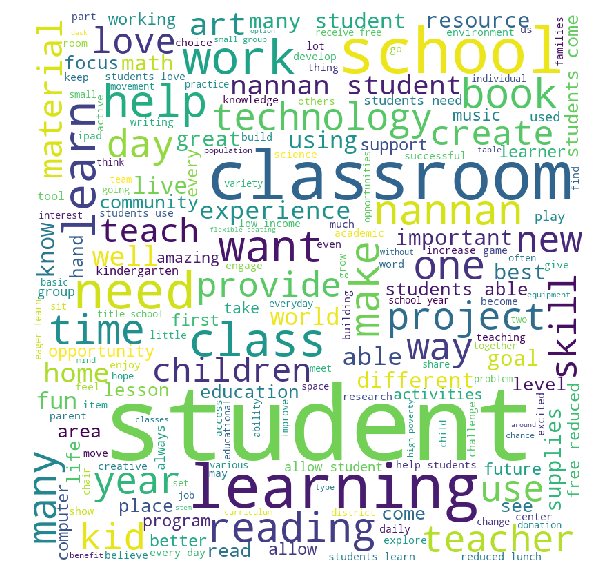

In [70]:
# iterate through the csv file 
for val in FP_essay: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### BOX plot of price of these False positive data points`

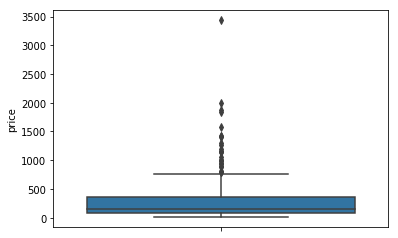

In [71]:
import seaborn
seaborn.boxplot(X_test["price"][FP_index],orient='v')

#### PDF of  teacher_number_of_previously_posted_projects of these False positive data points`

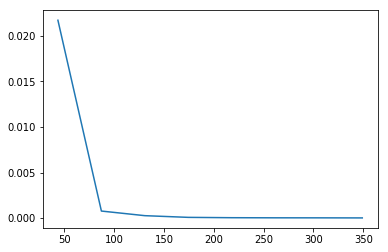

In [72]:
#https://stackoverflow.com/questions/37373457/how-to-plot-probability-density-function-pdf-of-inter-arrival-time-of-events
Teacher_posted = X_test["teacher_number_of_previously_posted_projects"]
hist, bins = np.histogram(Teacher_posted, bins=8, normed=True)
plt.plot(bins[1:], hist)

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [55]:
Set4_train=hstack((categorical_numerical_features_X_train_stack,tfidf_w2v_vectors_essay_X_train,tfidf_w2v_vectors_project_title_X_train)).toarray()
Set4_test=hstack((categorical_numerical_features_X_test_stack,tfidf_w2v_vectors_essay_X_test,tfidf_w2v_vectors_project_title_X_test)).toarray()

In [56]:
print('Tfidf_W2V_train{}\nTfidf_W2V_test{}'.format(Set4_train.shape,Set4_test.shape))

Tfidf_W2V_train(32000, 702)
Tfidf_W2V_test(8000, 702)


In [57]:
DT = DecisionTreeClassifier()
param_grid = {"max_depth":[1, 5, 10, 50, 100, 500, 1000],"min_samples_split": [5, 10, 100, 500]}
clf = GridSearchCV(DT,param_grid = param_grid,cv=3, scoring='roc_auc')
clf.fit(Set4_train,Y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

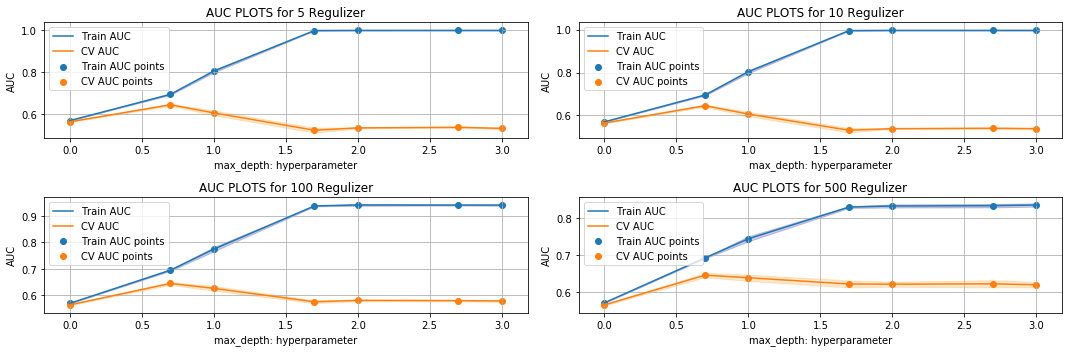

In [58]:
plt.figure(figsize=(15,5))

train_auc_5= clf.cv_results_['mean_train_score'][::4]
train_auc_std_5= clf.cv_results_['std_train_score'][::4]
cv_auc_5 = clf.cv_results_['mean_test_score'][::4]
cv_auc_std_5= clf.cv_results_['std_test_score'][::4]

plt.subplot(2,2,1)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_5, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_5 - train_auc_std_5,train_auc_5 + train_auc_std_5,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), cv_auc_5, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),cv_auc_5 - cv_auc_std_5,cv_auc_5 + cv_auc_std_5,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_5, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), cv_auc_5, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 5 Regulizer")
plt.grid()

train_auc_10= clf.cv_results_['mean_train_score'][1::4]
train_auc_std_10= clf.cv_results_['std_train_score'][1::4]

cv_auc_10 = clf.cv_results_['mean_test_score'][1::4]
cv_auc_std_10= clf.cv_results_['std_test_score'][1::4]


plt.subplot(2,2,2)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_10, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_10 - train_auc_std_10,train_auc_10 + train_auc_std_10,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), cv_auc_10, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),cv_auc_10 - cv_auc_std_10,cv_auc_10 + cv_auc_std_10,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_10, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), cv_auc_10, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 10 Regulizer")
plt.grid()


train_auc_100= clf.cv_results_['mean_train_score'][2::4]
train_auc_std_100= clf.cv_results_['std_train_score'][2::4]
Cv_auc_100 = clf.cv_results_['mean_test_score'][2::4]
Cv_auc_std_100= clf.cv_results_['std_test_score'][2::4]

plt.subplot(2,2,3)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_100, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_100 - train_auc_std_100,train_auc_100 + train_auc_std_100,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), Cv_auc_100, label='CV AUC')
plt.gca().fill_between(np.log10(param_grid["max_depth"]),Cv_auc_100 - Cv_auc_std_100,Cv_auc_100 + Cv_auc_std_100,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_100, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), Cv_auc_100, label='CV AUC points')

plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 100 Regulizer")
plt.grid()

train_auc_500= clf.cv_results_['mean_train_score'][3::4]
train_auc_std_500= clf.cv_results_['std_train_score'][3::4]
Cv_auc_500 = clf.cv_results_['mean_test_score'][3::4]
Cv_auc_std_500= clf.cv_results_['std_test_score'][3::4]

plt.subplot(2,2,4)
plt.plot(np.log10(param_grid["max_depth"]), train_auc_500, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),train_auc_500 - train_auc_std_500,train_auc_500 + train_auc_std_500,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid["max_depth"]), Cv_auc_500, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid["max_depth"]),Cv_auc_500 - Cv_auc_std_500,Cv_auc_500 + Cv_auc_std_500,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['max_depth']), train_auc_500, label='Train AUC points')
plt.scatter(np.log10(param_grid['max_depth']), Cv_auc_500, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC PLOTS for 500 Regulizer")
plt.grid()
plt.tight_layout()
plt.show()

In [59]:
max_auc = np.max(clf.cv_results_['mean_test_score'])
best_fit_dept_Set4=clf.best_params_["max_depth"]
best_fit_min_split_Set4=clf.best_params_["min_samples_split"]
print('Best_max_depth : {}\nBest_min_samples_split : {}\nmax_auc : {}'.format (best_fit_dept_Set4,best_fit_min_split_Set4,max_auc))

Best_max_depth : 5
Best_min_samples_split : 5
max_auc : 0.645553691156739


In [60]:
model4 = DecisionTreeClassifier(max_depth=best_fit_dept_Set4,min_samples_split=best_fit_min_split_Set4)
model4 = model4.fit(Set4_train,Y_train)

In [61]:
fpr_tr,tpr_tr,th_tr = roc_curve(y_true=Y_train,y_score=model4.predict_proba(Set4_train)[:,1])
auc_train = roc_auc_score(y_true=Y_train,y_score=model4.predict_proba(Set4_train)[:,1])
fpr_te,tpr_te,th_te = roc_curve(y_true=Y_test,y_score=model4.predict_proba(Set4_test)[:,1])
auc_test = roc_auc_score(y_true=Y_test,y_score=model4.predict_proba(Set4_test)[:,1])

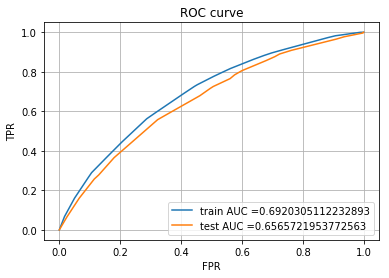

In [62]:
plt.plot(fpr_tr, tpr_tr, label="train AUC ="+str(auc_train))
plt.plot(fpr_te, tpr_te, label="test AUC ="+str(auc_test))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

In [63]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [64]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(model4.predict_proba(Set4_train)[:,-1], th_tr, fpr_tr, tpr_tr)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(model4.predict_proba(Set4_test)[:,1], th_te, fpr_te, tpr_te)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.40790983496679184 for threshold 0.852
[[ 2909  2016]
 [ 8377 18698]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3777095631641086 for threshold 0.854
[[ 776  434]
 [2791 3999]]


the maximum value of tpr*(1-fpr) 0.3777095631641086 for threshold 0.854


Text(0.5, 1.0, 'Confusion matrix for Test data')

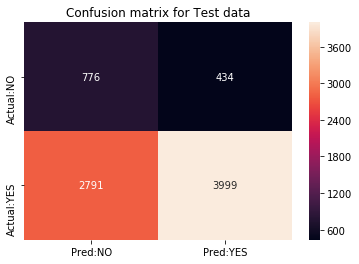

In [65]:
from seaborn import heatmap
heatmap((confusion_matrix(Y_test, predict(model4.predict_proba(Set4_test)[:,1], th_te, fpr_te, tpr_te))),annot=True, fmt="d",xticklabels=["Pred:NO","Pred:YES"],yticklabels=["Actual:NO","Actual:YES"])
plt.title("Confusion matrix for Test data")

#### Finding False positive data points

In [66]:
model_predicted = np.array([predict(model4.predict_proba(Set4_test)[:,1], th_te, fpr_te, tpr_te)])\
.reshape(Set4_test.shape[0],-1)[:,0]

the maximum value of tpr*(1-fpr) 0.3777095631641086 for threshold 0.854


In [67]:
def index (array) :
    index = []
    for i in range (len(array)):
        if (array[i]==True):
            index.append(i)
    return index

In [68]:
Predicted_1 = model_predicted ==1
unique,counts = np.unique(Predicted_1,return_counts=True)
print(dict(zip(unique, counts)))
index_Predicted_1 = index(Predicted_1)
print(len(index_Predicted_1))

{False: 3567, True: 4433}
4433


In [69]:
Actual_0 = np.array(Y_test) == 0
unique,counts = np.unique(Actual_0,return_counts=True)
print(dict(zip(unique, counts)))
index_Actual_0 = index(Actual_0)
print(len(index_Actual_0))

{False: 6790, True: 1210}
1210


In [70]:
FP_index = []
for i in index_Actual_0:
    if i in index_Predicted_1:
        FP_index.append(i)
print("index of Fp : ",FP_index)
print("Number of FP index we got : ",len(FP_index))
confus_matrix=confusion_matrix(np.array(Y_test), model_predicted)
print("Number of FP from confus_matrix: ",confus_matrix[0,1])


index of Fp :  [29, 70, 73, 97, 99, 114, 132, 147, 159, 203, 232, 245, 263, 303, 315, 327, 332, 333, 344, 351, 354, 355, 368, 374, 429, 450, 453, 462, 498, 516, 554, 564, 574, 634, 645, 664, 679, 693, 701, 702, 711, 715, 717, 723, 793, 797, 810, 820, 829, 842, 863, 879, 880, 895, 904, 916, 931, 967, 986, 1001, 1014, 1058, 1062, 1069, 1083, 1085, 1090, 1100, 1108, 1112, 1120, 1132, 1135, 1137, 1179, 1183, 1205, 1208, 1296, 1317, 1353, 1367, 1401, 1408, 1431, 1436, 1442, 1452, 1463, 1492, 1506, 1515, 1538, 1571, 1574, 1598, 1604, 1646, 1667, 1681, 1694, 1705, 1707, 1726, 1783, 1786, 1797, 1809, 1901, 1903, 1922, 1930, 1951, 2001, 2012, 2041, 2069, 2096, 2110, 2113, 2118, 2123, 2145, 2150, 2174, 2198, 2225, 2228, 2254, 2272, 2287, 2361, 2367, 2416, 2427, 2491, 2497, 2499, 2501, 2524, 2537, 2592, 2643, 2653, 2680, 2690, 2699, 2705, 2709, 2714, 2715, 2721, 2728, 2762, 2778, 2792, 2795, 2810, 2846, 2847, 2862, 2882, 2897, 2918, 2933, 2934, 2944, 2979, 2981, 2982, 2985, 3014, 3066, 3083, 3099

#### Building wordcloud

In [71]:
FP_essay = X_test["essay"][FP_index]

In [72]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
  
comment_words = ' '
stopwords = set(STOPWORDS) 

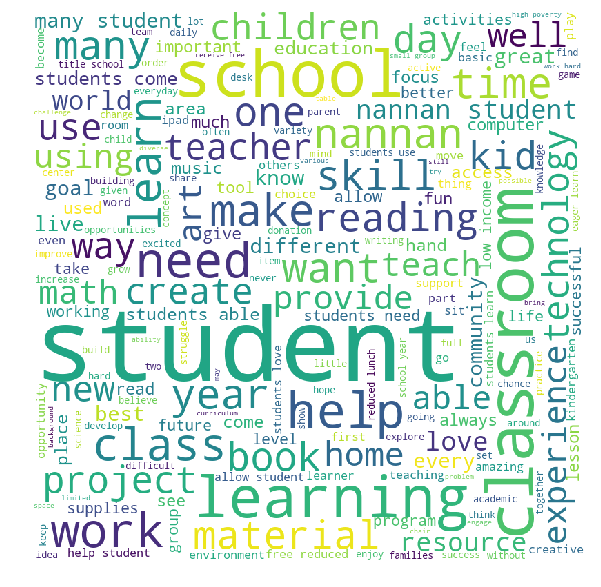

In [73]:
# iterate through the csv file 
for val in FP_essay: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### BOX plot of price of these False positive data points`

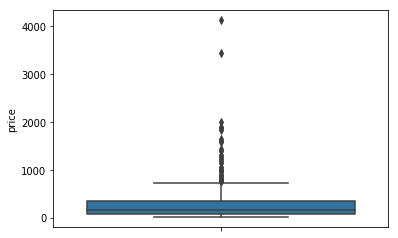

In [74]:
import seaborn
seaborn.boxplot(X_test["price"][FP_index],orient='v')

#### PDF of  teacher_number_of_previously_posted_projects of these False positive data points`

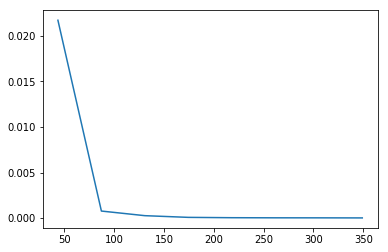

In [75]:
#https://stackoverflow.com/questions/37373457/how-to-plot-probability-density-function-pdf-of-inter-arrival-time-of-events
Teacher_posted = X_test["teacher_number_of_previously_posted_projects"]
hist, bins = np.histogram(Teacher_posted, bins=8, normed=True)
plt.plot(bins[1:], hist)

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [76]:
Set2_train=hstack((categorical_numerical_features_X_train_stack,essay_tfidf_X_train,project_title_tfidf_X_train)).toarray()
Set2_test=hstack((categorical_numerical_features_X_test_stack,essay_tfidf_X_test,project_title_tfidf_X_test)).toarray()

###### Got this max depth and min sample values from set 2 data which we have obtained through hyperparamter tuning above
#### Best_max_depth : 10 , Best_min_samples_split : 500, max_auc : 0.6640837288485731

In [77]:
model = DecisionTreeClassifier(max_depth=10,min_samples_split=500)
model = model.fit(Set2_train,Y_train)
top_feature_index = np.argsort(model.feature_importances_)[::-1][:2000]

In [78]:
Set5_train=Set2_train[:,top_feature_index]
Set5_test=Set2_test[:,top_feature_index]

In [79]:
from sklearn.linear_model import SGDClassifier
param_grid={"alpha" : [10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5]}
LR = SGDClassifier(loss='log',n_jobs=-1)
clf = GridSearchCV(LR,param_grid={"alpha" : [10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5]})
clf.fit(Set5_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

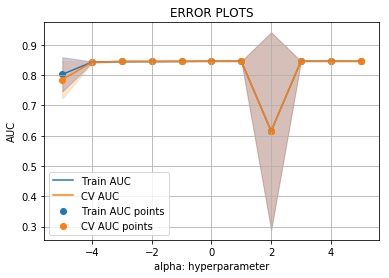

In [80]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(np.log10(param_grid['alpha']), train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid['alpha']),train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(np.log10(param_grid['alpha']), cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(param_grid['alpha']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(np.log10(param_grid['alpha']), train_auc, label='Train AUC points')
plt.scatter(np.log10(param_grid['alpha']), cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [81]:
max_auc = np.max(clf.cv_results_['mean_test_score'])
best_fit_alpha_Set5=clf.best_params_["alpha"]
print('Best_alpha : {}\nmax_auc : {}'.format (best_fit_alpha_Set5,max_auc))

Best_alpha : 1
max_auc : 0.84609375


In [82]:
model5 = SGDClassifier(alpha=best_fit_alpha_Set5,loss='log',n_jobs=-1)
model5.fit(Set5_train,Y_train)

SGDClassifier(alpha=1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [83]:
fpr_tr,tpr_tr,th_tr = roc_curve(y_true=Y_train,y_score=model5.predict_proba(Set5_train)[:,1])
auc_train = roc_auc_score(y_true=Y_train,y_score=model5.predict_proba(Set5_train)[:,1])
fpr_te,tpr_te,th_te = roc_curve(y_true=Y_test,y_score=model5.predict_proba(Set5_test)[:,1])
auc_test = roc_auc_score(y_true=Y_test,y_score=model5.predict_proba(Set5_test)[:,1])

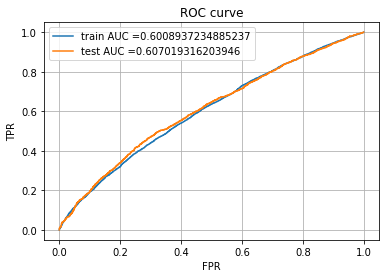

In [84]:
plt.plot(fpr_tr, tpr_tr, label="train AUC ="+str(auc_train))
plt.plot(fpr_te, tpr_te, label="test AUC ="+str(auc_test))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

In [85]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [86]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(model5.predict_proba(Set5_train)[:,-1], th_tr, fpr_tr, tpr_tr)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(model5.predict_proba(Set5_test)[:,1], th_te, fpr_te, tpr_te)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3255922043955735 for threshold 0.811
[[ 2739  2186]
 [11224 15851]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3362881729329714 for threshold 0.812
[[ 810  400]
 [3379 3411]]


the maximum value of tpr*(1-fpr) 0.3362881729329714 for threshold 0.812


Text(0.5, 1.0, 'Confusion matrix for Test data')

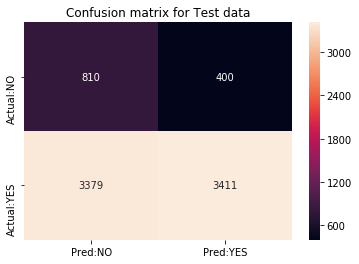

In [87]:
from seaborn import heatmap
heatmap(confusion_matrix(Y_test, predict(model5.predict_proba(Set5_test)[:,1], th_te, fpr_te, tpr_te)),annot=True, fmt="d",xticklabels=["Pred:NO","Pred:YES"],yticklabels=["Actual:NO","Actual:YES"])
plt.title("Confusion matrix for Test data")

#### Finding False positive data points

In [98]:
model_predicted = np.array([predict(model5.predict_proba(Set5_test)[:,1], th_te, fpr_te, tpr_te)])\
.reshape(Set5_test.shape[0],-1)[:,0]

the maximum value of tpr*(1-fpr) 0.3362881729329714 for threshold 0.812


In [99]:
def index (array) :
    index = []
    for i in range (len(array)):
        if (array[i]==True):
            index.append(i)
    return index

In [100]:
Predicted_1 = model_predicted ==1
unique,counts = np.unique(Predicted_1,return_counts=True)
print(dict(zip(unique, counts)))
index_Predicted_1 = index(Predicted_1)
print(len(index_Predicted_1))

{False: 4189, True: 3811}
3811


In [101]:
Actual_0 = np.array(Y_test) == 0
unique,counts = np.unique(Actual_0,return_counts=True)
print(dict(zip(unique, counts)))
index_Actual_0 = index(Actual_0)
print(len(index_Actual_0))

{False: 6790, True: 1210}
1210


In [102]:
FP_index = []
for i in index_Actual_0:
    if i in index_Predicted_1:
        FP_index.append(i)

print("Number of FP index we got : ",len(FP_index))
confus_matrix=confusion_matrix(np.array(Y_test), model_predicted)
print("Number of FP from confus_matrix: ",confus_matrix[0,1])


Number of FP index we got :  400
Number of FP from confus_matrix:  400


#### Building wordcloud

In [103]:
FP_essay = X_test["essay"][FP_index]

In [104]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
  
comment_words = ' '
stopwords = set(STOPWORDS) 

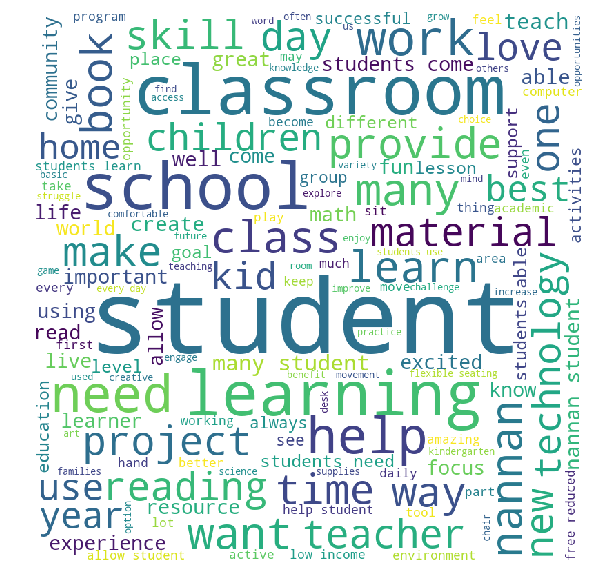

In [105]:
# iterate through the csv file 
for val in FP_essay: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### BOX plot of price of these False positive data points`

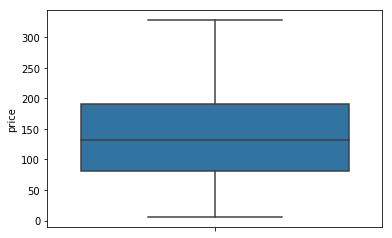

In [106]:
import seaborn
seaborn.boxplot(X_test["price"][FP_index],orient='v')

#### PDF of  teacher_number_of_previously_posted_projects of these False positive data points`

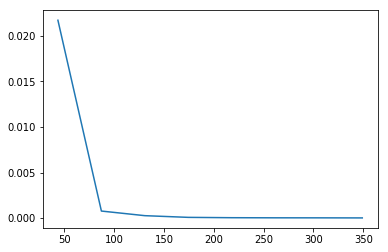

In [107]:
#https://stackoverflow.com/questions/37373457/how-to-plot-probability-density-function-pdf-of-inter-arrival-time-of-events
Teacher_posted = X_test["teacher_number_of_previously_posted_projects"]
hist, bins = np.histogram(Teacher_posted, bins=8, normed=True)
plt.plot(bins[1:], hist)

<h1>3. Conclusions</h1>

In [110]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer","Model","Max_depth","Min_split","Train AUC","Test AUC"]
x.add_row(["BOW","DT",10,500,0.720,0.670])
x.add_row(["TFIDF","DT",10,500,0.723,0.677])
x.add_row(["W2V","DT",5,500,0.680,0.660])
x.add_row(["TFIDF W2V","DT",5,5,0.692,0.656])
print(x)

+------------+-------+-----------+-----------+-----------+----------+
| Vectorizer | Model | Max_depth | Min_split | Train AUC | Test AUC |
+------------+-------+-----------+-----------+-----------+----------+
|    BOW     |   DT  |     10    |    500    |    0.72   |   0.67   |
|   TFIDF    |   DT  |     10    |    500    |   0.723   |  0.677   |
|    W2V     |   DT  |     5     |    500    |    0.68   |   0.66   |
| TFIDF W2V  |   DT  |     5     |     5     |   0.692   |  0.656   |
+------------+-------+-----------+-----------+-----------+----------+


In [112]:
y = PrettyTable()
y.field_names = ["Vectorizer","Model","Hyper paramater","Train AUC","Test AUC"]
y.add_row(["top 2000 featuers","Logestic Regression",10,0.600,0.607])
print(x)

+-------------------+---------------------+-----------------+-----------+----------+
|     Vectorizer    |        Model        | Hyper paramater | Train AUC | Test AUC |
+-------------------+---------------------+-----------------+-----------+----------+
| top 2000 featuers | Logestic Regression |        10       |    0.6    |  0.607   |
+-------------------+---------------------+-----------------+-----------+----------+
